In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train.csv') # uses pandas library to open a .csv file


In [3]:
data

,Fruit Size,Fruit Color,Leaf Size,label
0,60,16,20,0
1,36,34,15,0
2,94,33,15,0
3,36,67,72,1
4,99,61,3,0
...,...,...,...,...
195,22,53,48,1
196,61,36,34,0
197,59,60,99,1
198,43,91,53,1


In [2]:

size=int(len(data)/2)
train=data[:size]
test=data[size:]
# train data
xtrain=train.drop('label',axis=1)
ytrain=train['label']

def scale(x):
    return ((x-np.mean(x))/np.std(x))

x=scale(xtrain)
x=np.array(x)
y=np.array(ytrain)
print("x",x.shape)
print("y",y.shape)
x=x.T
y=y.reshape(1,y.shape[0])
print("x",x.shape)
print("y",y.shape)

x (100, 3)
y (100,)
x (3, 100)
y (1, 100)


### Due to `Data width` we have split data into two equal halves, one for train and the other for test 

In [3]:
#test data
xtest=test.drop('label',axis=1)
ytest=test['label']

def scale(x):
    return ((x-np.mean(x))/np.std(x))

xt=scale(xtest)
xt=np.array(xt)
yt=np.array(ytest)
print("x",xt.shape)
print("y",yt.shape)
xt=xt.T
yt=yt.reshape(1,yt.shape[0])
print("x",xt.shape)
print("y",yt.shape)

x (100, 3)
y (100,)
x (3, 100)
y (1, 100)


## Creating A Deep neural network with two hidden layers from scratch 
### Steps:
- Define size of layers { `Input` , `Hidden` and `Output layers`} # size of layer is number of neurons in the layer
- Define and Initialize `Weights` # random intialization
- Compute `Forward propagation` the process in which we use the current weights to compute our predictions
- Compute `Loss` (cost function) 
- Begin `Weights adaptation` using `Backward Propagation` 
    which is the process of computing the `derivatives` of the elements that affects the final activation function
    ,we use these values to update the weights of the neuron using `gradient descent`
#### - `FOCUS` the most important thing to know is that `Data width` is important
the data you train you should input same size of data with same shape 

`Note` Neural Network siad to be Deep when  it has 2 or more hidden layers

In [4]:
def define_layers(x,y,h1,h2):
    i_l=x.shape[0] # input_layer
    h_l1=h1
    h_l2=h2 #hiden_layer
    o_l= y.shape[0] #output_layer
    return i_l,h_l1,h_l2,o_l

In [5]:
def initialize_params(i_l,h_l1,h_l2,o_l):
    
    w1=np.random.randn(h_l1,i_l)*0.01
    b1=np.zeros((h_l1,1))
    
    w2=np.random.randn(h_l2,h_l1)*0.01
    b2=np.zeros((h_l2,1))

    
    w3=np.random.randn(o_l,h_l2)*0.01
    b3=np.zeros((o_l,1))
    
    
    print("w1:",w1.shape)
    print("b1:",b1.shape)
    
    print("w2:",w2.shape)
    print("b2:",b2.shape)
    
    print("w3:",w3.shape)
    print("b3:",b3.shape)

    par={"W1":w1,
         "b1":b1,
         "W2":w2,
         "b2":b2,
        "W3":w3,
        "b3":b3}
    return par

In [6]:
def sigmoid(z):
    p=1/(1+np.exp(-z))
    return p

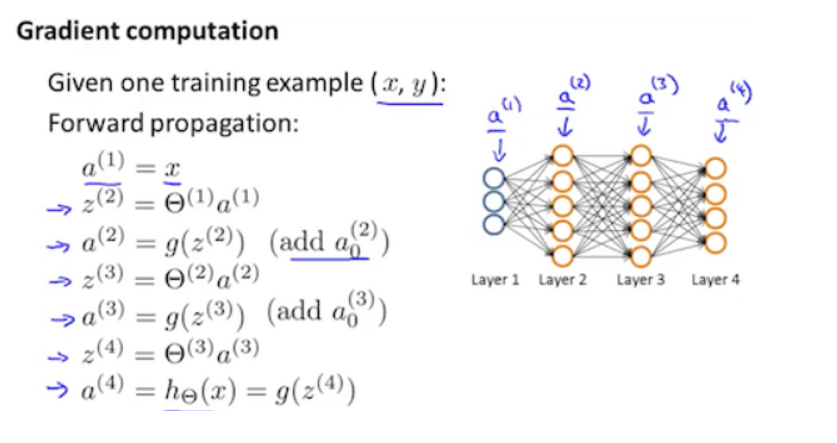

In [7]:
def forward_propagation(par,x):
    w1=par["W1"]
    b1=par["b1"]
    
    w2=par["W2"]
    b2=par["b2"]
    
    w3=par["W3"]
    b3=par["b3"]
    
    z1=np.dot(w1,x)+b1
    a1=np.tanh(z1)
    
    z2=np.dot(w2,a1)+b2
    a2=np.tanh(z2)
    
    z3=np.dot(w3,a2)+b3
    a3=sigmoid(z3)

    cache = {"z1": z1,
         "a1": a1,
         "z2": z2,
         "a2": a2,
         "z3": z3,
         "a3": a3
            }
    return a3,cache

In [8]:
def error(a3,y):#cost
    A2=a3
    Y=y
    m=y.shape[1]
    epsilon = 1e-5 # error happend cause log doesnt accept 0 so i add 1e-5 to 0
    cost = -np.sum(Y * np.log(A2 + epsilon) + (1 - Y) * np.log(1 - A2 + epsilon)) / m 
    return cost

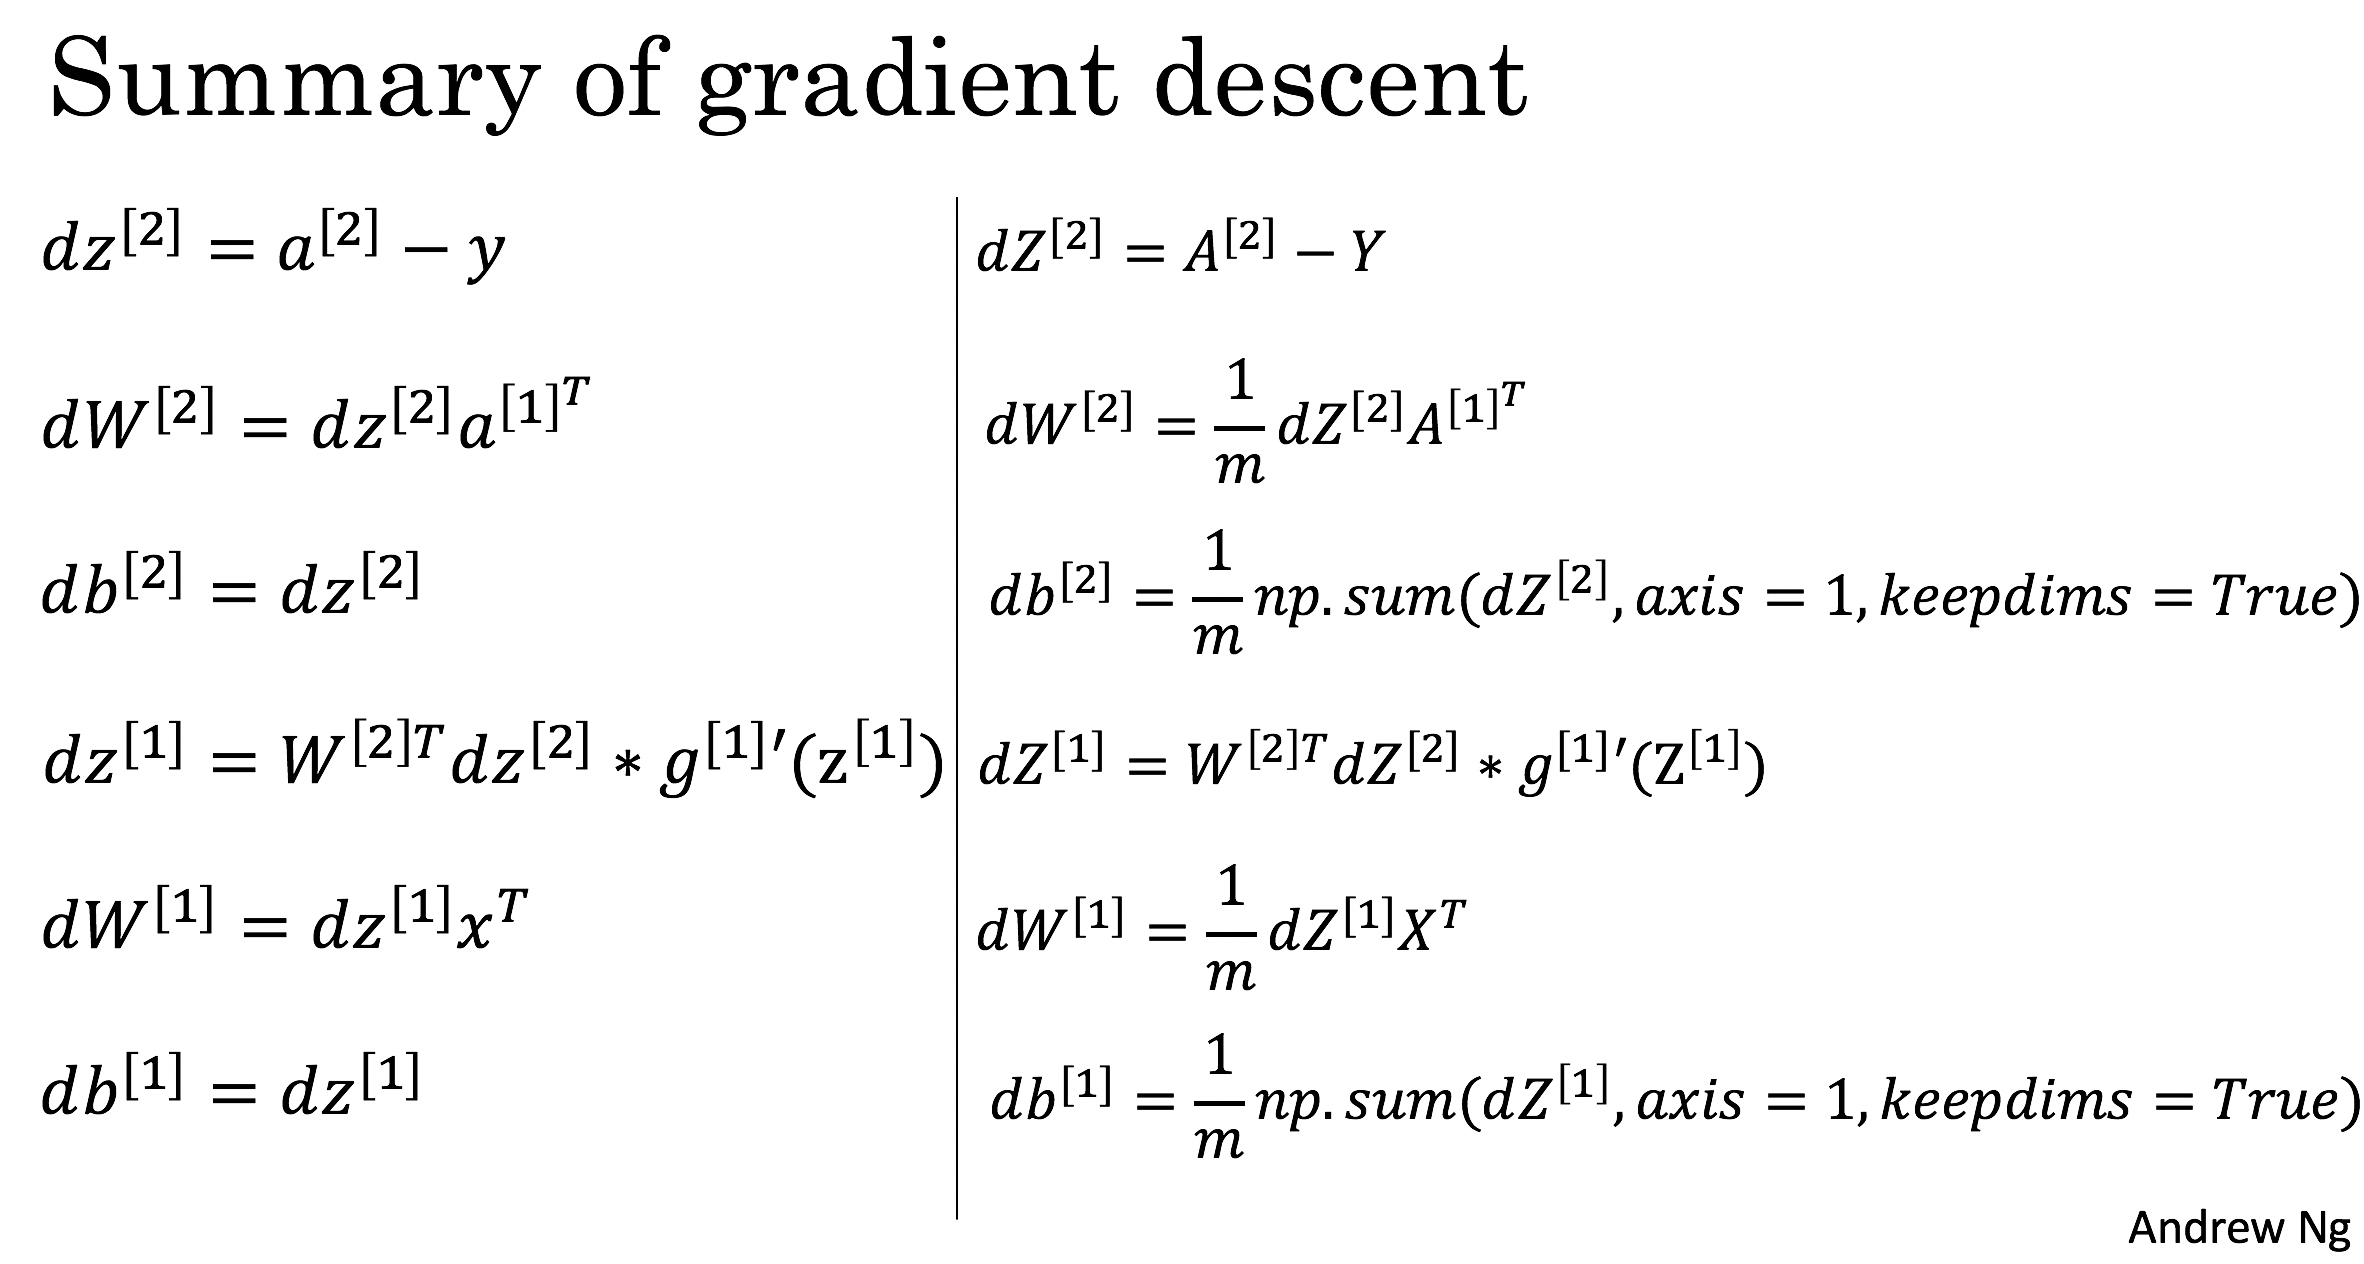

In [10]:
def back_propagation(cache,x,y,par):
    m=y.shape[1]
    w1=par["W1"]
    w2=par["W2"]
    w3=par["W3"]

    A1 = cache['a1']
    A2 = cache['a2']
    A3 = cache['a3']

    dz3=A3-y
    dw3=(1/m)*np.dot(dz3,A2.T)
    db3=(1/m)*np.sum(dz3, axis=1, keepdims=True)
    
    dz2=np.dot(w3.T,dz3)*(1-np.power(A2,2))
    dw2=(1/m)*np.dot(dz2,A1.T)
    db2=(1/m)*np.sum(dz2, axis=1, keepdims=True)
    
    dz1=np.dot(w2.T,dz2)*(1-np.power(A1,2))
    dw1=(1/m)*np.dot(dz1,x.T)
    db1=(1/m)*np.sum(dz1, axis=1, keepdims=True)
    
    DW = {"dW1": dw1,
             "db1": db1,
             "dW2": dw2,
             "db2": db2,
           "dW3": dw3,
             "db3": db3}
    return DW

In [11]:
def weights_adaptation(par,DW,LR):
    W1 = par["W1"]
    b1 = par["b1"]
    
    W2 = par["W2"]
    b2 = par["b2"]
    
    W3 = par["W3"]
    b3 = par["b3"]

    dW1 = DW["dW1"]
    db1 = DW["db1"]
    
    dW2 = DW["dW2"]
    db2 = DW["db2"]

    dW3 = DW["dW3"]
    db3 = DW["db3"]
    
    
    W1 = W1 - LR*dW1
    b1 = b1 - LR*db1
    
    W2 = W2 - LR*dW2
    b2 = b2 - LR*db2

    W3 = W3 - LR*dW3
    b3 = b3 - LR*db3
    
    WEIGHTS= {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3
             }
    return WEIGHTS

In [21]:
def predict(parameters, X):
    
    p, cache = forward_propagation(parameters,X)
    m=p.shape[1]
    final_prediction=np.zeros((1,m))
    for i in range(m):
        if p[0][i]>=0.5:
            final_prediction[0][i]=1
    return final_prediction

In [22]:
def model(x,y,hid_layer1,hid_layer2,num_iters,lr, print_cost=False):
    
    i_l,h_l1,h_l2,o_l=define_layers(x,y,hid_layer1,hid_layer2)
    par=initialize_params(i_l,h_l1,h_l2,o_l)
    costs=[]
    LR=lr
    for i in range(0, num_iters):
        a3,cache=forward_propagation(par,x)

        cost=error(a3,y)

        DW=back_propagation(cache,x,y,par) #DW derivatives

        par=weights_adaptation(par,DW,LR)

        if i%1000==0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
    return par

In [23]:
parameters=model(x,y,5,5,num_iters=10000,lr=0.5, print_cost=True)

w1: (5, 3)
b1: (5, 1)
w2: (5, 5)
b2: (5, 1)
w3: (1, 5)
b3: (1, 1)
Cost after iteration 0: 0.693128
Cost after iteration 1000: 0.000673
Cost after iteration 2000: 0.000278
Cost after iteration 3000: 0.000170
Cost after iteration 4000: 0.000120
Cost after iteration 5000: 0.000091
Cost after iteration 6000: 0.000073
Cost after iteration 7000: 0.000060
Cost after iteration 8000: 0.000051
Cost after iteration 9000: 0.000043


In [25]:
# Print accuracy
predictions = predict(parameters, x)
print ('Accuracy: {} %'.format(float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100)))

Accuracy: 100.0 %


In [26]:
predictions = predict(parameters, xt)
print(predictions)

[[1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
  0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1.
  0. 1. 1. 0.]]


In [27]:
yt

array([[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]], dtype=int64)